### `Name` : Ayush Panchal

### `Roll No` : P24DS013

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"dataset\mobile-dataset.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Battery Power: Continuous data. This represents the battery capacity, usually in milliampere-hours (mAh).

Blue: Nominal data (binary). This represents whether the mobile has Bluetooth connectivity (0 = No, 1 = Yes).

Clock Speed: Continuous data. This represents the speed of the processor, likely in GHz.

Dual Sim: Nominal data (binary). This indicates whether the phone supports dual SIM cards (0 = No, 1 = Yes).

Front Camera (fc): Continuous data (discrete in the sense of integer values). Represents the resolution of the front camera in megapixels (MP).

4G (four_g): Nominal data (binary). Indicates whether the phone supports 4G connectivity (0 = No, 1 = Yes).

Internal Memory (int_memory): Continuous data (discrete). Represents the internal memory of the mobile in GB.

Mobile Depth (m_dep): Continuous data. Represents the thickness of the phone in cm or mm.

Mobile Weight (mobile_wt): Continuous data. Represents the weight of the phone in grams.

Number of Cores (n_cores): Ordinal data. Represents the number of processor cores (1 to n cores).

Primary Camera (pc): Continuous data (discrete). Represents the resolution of the primary camera in MP.

Pixel Height (px_height): Continuous data (discrete). Represents the height of the phone’s display resolution in pixels.

Pixel Width (px_width): Continuous data (discrete). Represents the width of the phone’s display resolution in pixels.

RAM: Continuous data. Represents the memory in MB.

Screen Height (sc_h): Continuous data (discrete). Represents the height of the screen in cm.

Screen Width (sc_w): Continuous data (discrete). Represents the width of the screen in cm.

Talk Time: Continuous data. Represents the battery talk time in hours.

3G (three_g): Nominal data (binary). Indicates whether the phone supports 3G connectivity (0 = No, 1 = Yes).

Touchscreen: Nominal data (binary). Indicates whether the phone has a touchscreen (0 = No, 1 = Yes).

WiFi: Nominal data (binary). Indicates whether the phone supports WiFi (0 = No, 1 = Yes).

Price Range: Ordinal data. Represents the price range of the phone (likely encoded, such as 0 = low, 1 = medium, 2 = high, etc.).

In [6]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [16]:
# Univariate Analysis

# Price Range Distribution
price_range_counts = df['price_range'].value_counts()
print("Price Range Distribution:")
print(price_range_counts)

# RAM Distribution (Basic Statistics)
ram_stats = df['ram'].describe()
print("\nRAM Statistics:")
print(ram_stats)

# Battery Power Distribution (Basic Statistics)
battery_power_stats = df['battery_power'].describe()
print("\nBattery Power Statistics:")
print(battery_power_stats)


Price Range Distribution:
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

RAM Statistics:
count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64

Battery Power Statistics:
count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64


In [17]:
# Multivariate Analysis

# RAM vs. Price Range
ram_price_range = df.groupby('price_range')['ram'].describe()
print("\nRAM Statistics by Price Range:")
print(ram_price_range)

# Battery Power vs. Talk Time (Correlation)
battery_talk_correlation = df[['battery_power', 'talk_time']].corr().iloc[0, 1]
print("\nCorrelation between Battery Power and Talk Time:")
print(f"Correlation Coefficient: {battery_talk_correlation:.2f}")

# Screen Dimensions vs. Price Range (Mean values)
screen_stats_by_price = df.groupby('price_range')[['sc_w', 'sc_h']].mean()
print("\nAverage Screen Width and Height by Price Range:")
print(screen_stats_by_price)



RAM Statistics by Price Range:
             count      mean         std     min      25%     50%      75%  \
price_range                                                                  
0            500.0   785.314  362.755397   256.0   488.75   719.5  1037.00   
1            500.0  1679.490  465.850159   387.0  1354.00  1686.5  2033.75   
2            500.0  2582.816  496.211735  1185.0  2292.75  2577.0  2927.00   
3            500.0  3449.232  393.019923  2259.0  3207.50  3509.5  3764.75   

                max  
price_range          
0            1974.0  
1            2811.0  
2            3916.0  
3            3998.0  

Correlation between Battery Power and Talk Time:
Correlation Coefficient: 0.05

Average Screen Width and Height by Price Range:
              sc_w    sc_h
price_range               
0            5.682  12.324
1            5.544  12.212
2            5.714  12.010
3            6.128  12.680


In [21]:
# Statistical Analysis

# Variance, Standard Deviation, Range, etc.
stats = df.describe().T[['mean', 'std', 'min', 'max']]
stats['range'] = stats['max'] - stats['min']
stats['variance'] = stats['std'] ** 2
print("\nStatistical Summary:")
print(stats)

# Correlation Matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
correlation_matrix



Statistical Summary:
                     mean          std    min     max   range      variance
battery_power  1238.51850   439.418206  501.0  1998.0  1497.0  1.930884e+05
blue              0.49500     0.500100    0.0     1.0     1.0  2.501001e-01
clock_speed       1.52225     0.816004    0.5     3.0     2.5  6.658629e-01
dual_sim          0.50950     0.500035    0.0     1.0     1.0  2.500348e-01
fc                4.30950     4.341444    0.0    19.0    19.0  1.884813e+01
four_g            0.52150     0.499662    0.0     1.0     1.0  2.496626e-01
int_memory       32.04650    18.145715    2.0    64.0    62.0  3.292670e+02
m_dep             0.50175     0.288416    0.1     1.0     0.9  8.318353e-02
mobile_wt       140.24900    35.399655   80.0   200.0   120.0  1.253136e+03
n_cores           4.52050     2.287837    1.0     8.0     7.0  5.234197e+00
pc                9.91650     6.064315    0.0    20.0    20.0  3.677592e+01
px_height       645.10800   443.780811    0.0  1960.0  1960.0  1.9

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


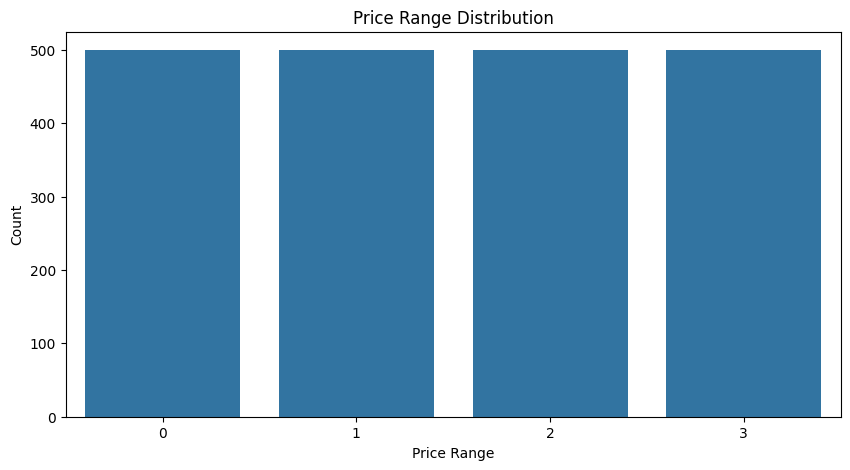

In [7]:
# Histogram for price_range
plt.figure(figsize=(10, 5))
sns.countplot(x='price_range', data=df)
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

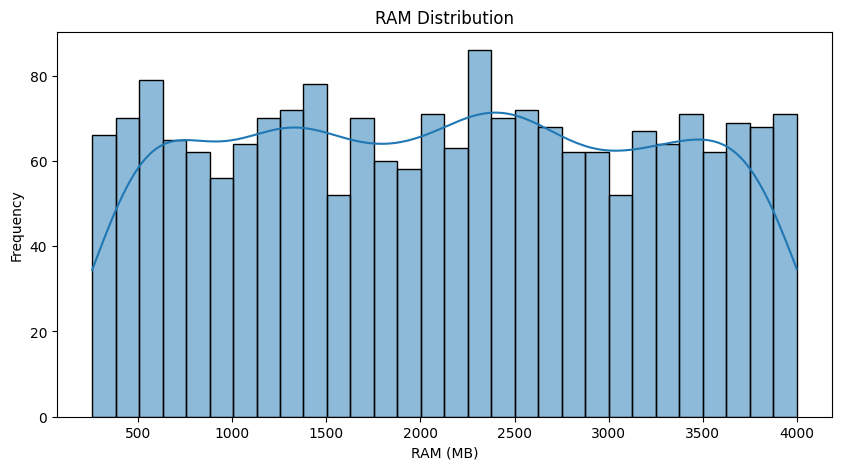

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['ram'], bins=30, kde=True)
plt.title('RAM Distribution')
plt.xlabel('RAM (MB)')
plt.ylabel('Frequency')
plt.show()

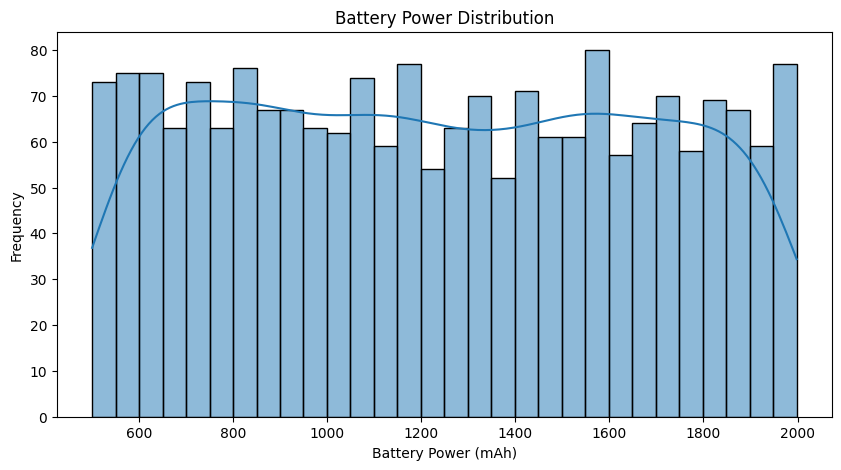

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['battery_power'], bins=30, kde=True)
plt.title('Battery Power Distribution')
plt.xlabel('Battery Power (mAh)')
plt.ylabel('Frequency')
plt.show()

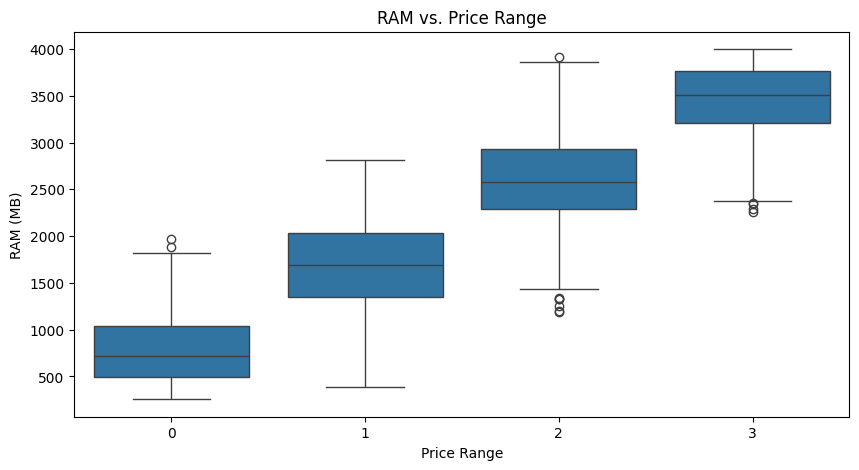

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='price_range', y='ram', data=df)
plt.title('RAM vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')
plt.show()

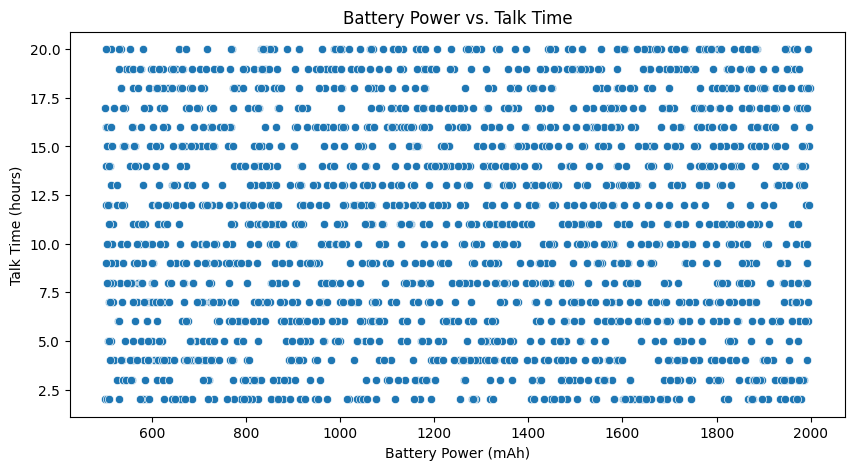

In [11]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='battery_power', y='talk_time', data=df)
plt.title('Battery Power vs. Talk Time')
plt.xlabel('Battery Power (mAh)')
plt.ylabel('Talk Time (hours)')
plt.show()

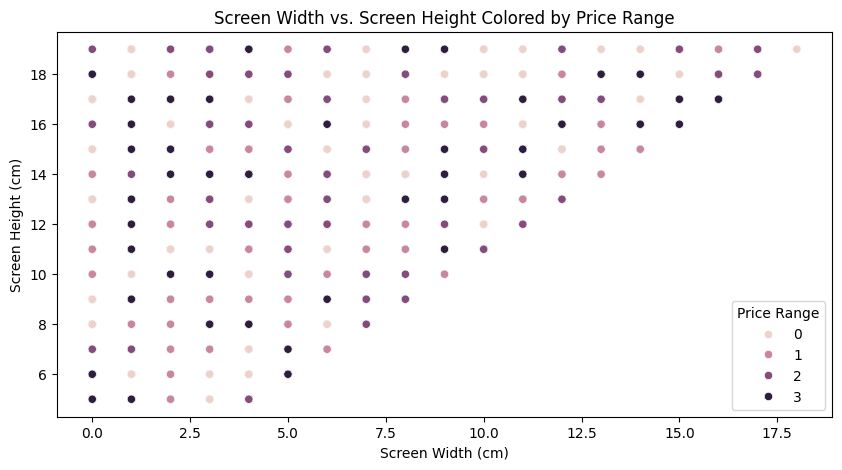

In [12]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='sc_w', y='sc_h', hue='price_range', data=df)
plt.title('Screen Width vs. Screen Height Colored by Price Range')
plt.xlabel('Screen Width (cm)')
plt.ylabel('Screen Height (cm)')
plt.legend(title='Price Range')
plt.show()

In [14]:
# Calculate variance, standard deviation, and range for continuous variables
stats = df.describe().T[['mean', 'std', 'min', 'max']]
stats['range'] = stats['max'] - stats['min']
stats['variance'] = stats['std'] ** 2
print(stats)



                     mean          std    min     max   range      variance
battery_power  1238.51850   439.418206  501.0  1998.0  1497.0  1.930884e+05
blue              0.49500     0.500100    0.0     1.0     1.0  2.501001e-01
clock_speed       1.52225     0.816004    0.5     3.0     2.5  6.658629e-01
dual_sim          0.50950     0.500035    0.0     1.0     1.0  2.500348e-01
fc                4.30950     4.341444    0.0    19.0    19.0  1.884813e+01
four_g            0.52150     0.499662    0.0     1.0     1.0  2.496626e-01
int_memory       32.04650    18.145715    2.0    64.0    62.0  3.292670e+02
m_dep             0.50175     0.288416    0.1     1.0     0.9  8.318353e-02
mobile_wt       140.24900    35.399655   80.0   200.0   120.0  1.253136e+03
n_cores           4.52050     2.287837    1.0     8.0     7.0  5.234197e+00
pc                9.91650     6.064315    0.0    20.0    20.0  3.677592e+01
px_height       645.10800   443.780811    0.0  1960.0  1960.0  1.969414e+05
px_width    

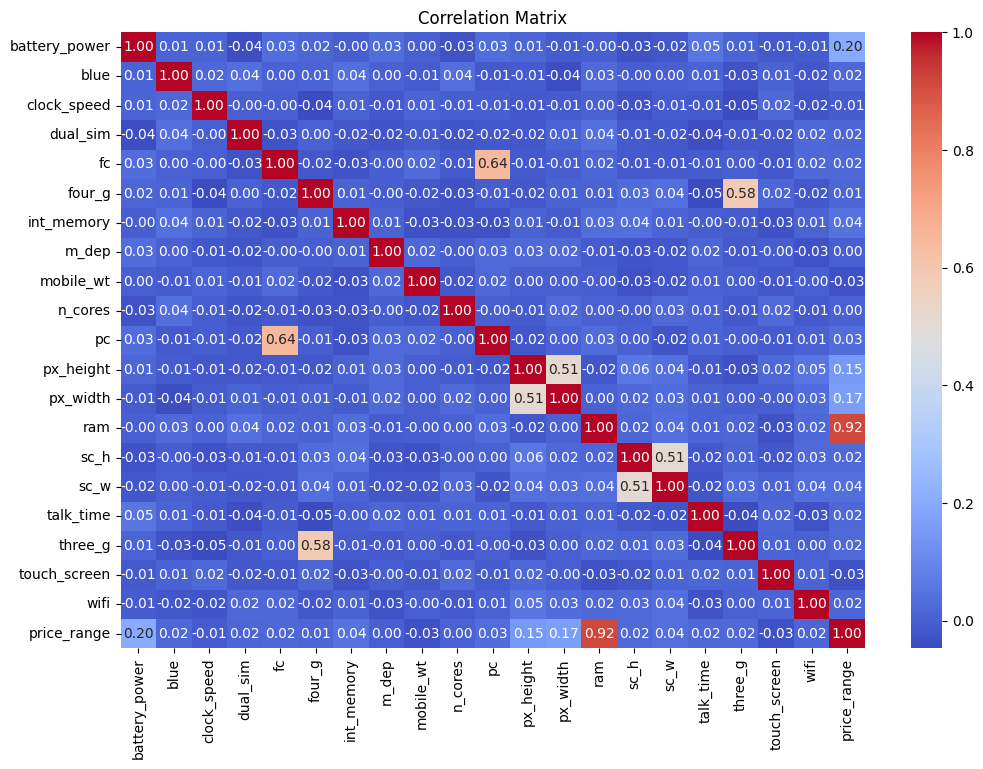

In [15]:
# Correlation matrix
correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()